In [1]:
import sys
sys.path.append('../.')
import models

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 36

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


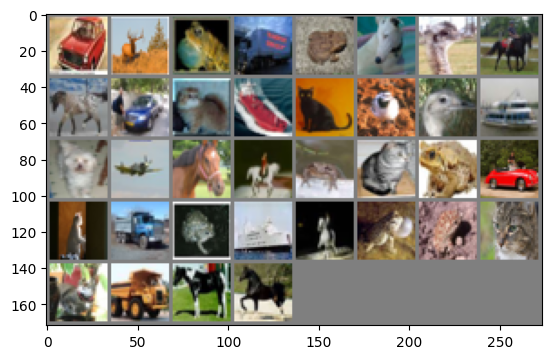

car   deer  frog  truck frog  dog   bird  horse horse car   cat   ship  cat   bird  bird  ship  dog   plane horse horse frog  cat   frog  car   cat   truck frog  ship  horse frog  frog  cat   cat   truck horse horse


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
images.shape

torch.Size([36, 3, 32, 32])

In [5]:
len(trainloader)

1389

In [6]:
net = models.CCTransformer(num_classes=10, emb_dim=128, num_blocks=3, num_conv_layers=2, out_channel_outputs=[64, 128], patch_size=None, C=3, max_seq=25)
net = net.to('cuda')

In [7]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.200
[1,   400] loss: 0.170
[1,   600] loss: 0.160
[1,   800] loss: 0.151
[1,  1000] loss: 0.148
[1,  1200] loss: 0.144
[2,   200] loss: 0.134
[2,   400] loss: 0.132
[2,   600] loss: 0.130
[2,   800] loss: 0.126
[2,  1000] loss: 0.125
[2,  1200] loss: 0.122
[3,   200] loss: 0.115
[3,   400] loss: 0.114
[3,   600] loss: 0.116
[3,   800] loss: 0.114
[3,  1000] loss: 0.114
[3,  1200] loss: 0.110
[4,   200] loss: 0.104
[4,   400] loss: 0.107
[4,   600] loss: 0.105
[4,   800] loss: 0.105
[4,  1000] loss: 0.105
[4,  1200] loss: 0.103
[5,   200] loss: 0.098
[5,   400] loss: 0.102
[5,   600] loss: 0.098
[5,   800] loss: 0.101
[5,  1000] loss: 0.099
[5,  1200] loss: 0.097
[6,   200] loss: 0.096
[6,   400] loss: 0.095
[6,   600] loss: 0.096
[6,   800] loss: 0.094
[6,  1000] loss: 0.096
[6,  1200] loss: 0.092
[7,   200] loss: 0.091
[7,   400] loss: 0.090
[7,   600] loss: 0.092
[7,   800] loss: 0.092
[7,  1000] loss: 0.091
[7,  1200] loss: 0.092
[8,   200] loss: 0.089
[8,   400] 

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %
